# Decision trees (DTs)

Hello and welcome to this workshop in which we will build together our first decision tree model. In this workshop we are going to create complexe tree and forest 
to solve classification problems.

**What you will learn:**
- Creation of decision tree models.
- How to train and optimize a model.
- Introduction to random forest.
- Analyzing model results.

## 1 - Packages ##

Please make sure you have the following programs installed:

- [Sklearn](http://scikit-learn.org/stable/) Simple and efficient tools for predictive data analysis.
- [Matplotlib](http://matplotlib.org) Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- [Numpy](https://numpy.org/) The fundamental package for scientific computing with Python

In [1]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline

## 2 - Dataset ##

First of all you must understand how to use the most important thing in machine leaning, the data.

To get started, let's get the data set. The following code will load your first data

In [14]:
flowers = load_iris()
X = flowers.data
Y = flowers.target

**Now that you have the dataset load we must analyze our data further.**

Your data set is slip into two important things, the data and the labels.
The data is the information about a state of an object and the label is the thing we are predicting. The label could be the future price of wheat, the kind of animal shown in a picture or in our case the kind of Iris

To train a model you must split your data into 2 batches. One to train and another to test your model.

**Exercise**: You must extract the data and the label from the dataset thanks to the " train_test_split " fonc and **print** their shape

**Help:** The train_test_split need 3 parameters and return 4 split data , you should look at this link [Data Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and give it a random state of 10 the data X and the target Y


In [8]:
#_need_data_container_# = #_ Need data split
#Print the shape
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


**Wanted output**:
       
<table style="width:20%">
  <tr>
    <td>shape de X_train</td>
    <td> (112, 4) </td> 
  </tr>
  
  <tr>
    <td>shape de x_test</td>
    <td>(38, 4) </td> 
  </tr>
    
   <tr>
    <td>shape de y_train</td>
    <td>(112,) </td> 
  </tr>
    <tr>
    <td>shape de y_test</td>
    <td>(38,) </td> 
  </tr>
</table>

**If the output are similar, your data is ready to be use**

## 3 - Build Decision Tree
To build our first Decision tree, you are going to use a very useful function "DecisionTreeClassifier" from the sklearn library. [Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier)
### 3.1 - Create tree ####

In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)

We have created the tree, now we need to fit it with our datas and labels (X_train, y_train).

The "fit" method consists in creating the most adequate prediction model for the data given to it as parameter, this is one of the most important method of the class

**Help**: you should look at tree.fit() method here [Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier.fit)

In [10]:
# need one line to fit tree
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

**Wanted output**:
       
<table style="width:20%">
  <tr>
    <td>DecisionTreeClassifier(random_state=0)</td>
  </tr>
</table>

### 3.2 - Display tree ####

In [11]:
from  src.tree.tree_fonc import *

create_graph_tree(tree, flowers.target_names, flowers.feature_names)
display_tree("tree.dot")

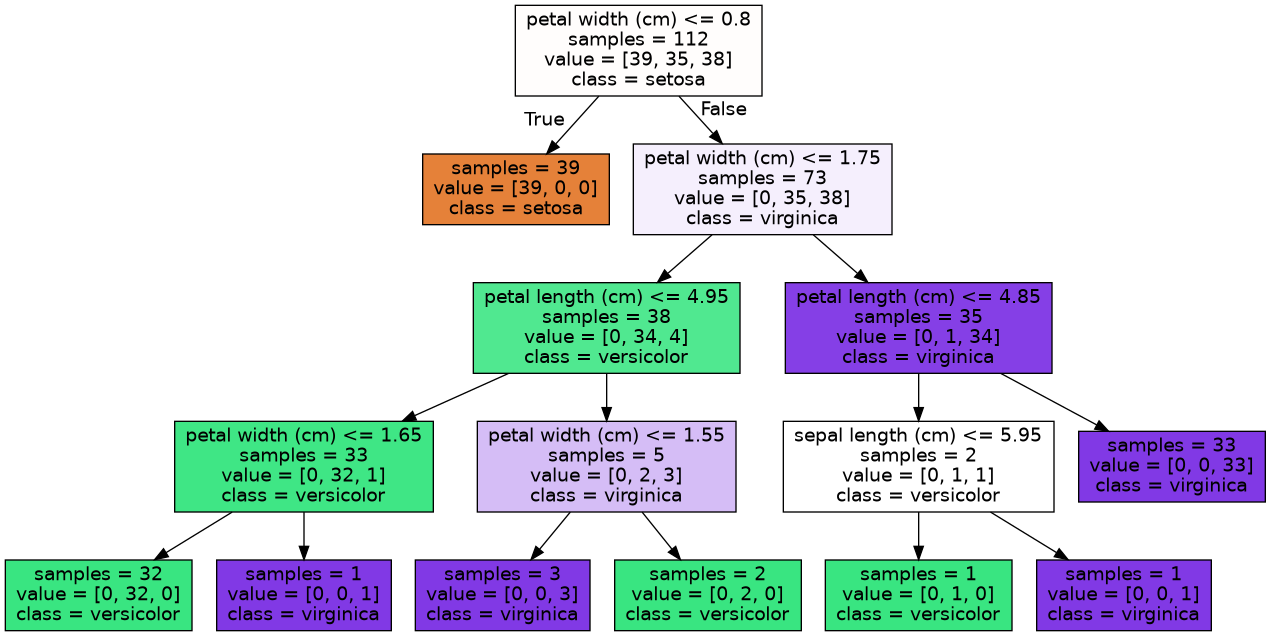

In [12]:
from IPython.display import Image
Image(filename='tree.png')

**As you can see, you create a tree we various branches an leaf and a depth of six.**

    You can now see how the model is going to predict the kind of iris for each picture depending on the petal length or width.

### 3.3 - Test our model ####

After the train phase, we can test our model. To test a tree model we use the score() build in method


In [15]:
print("Accuracy on training set: {:.3f} / 1.000".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f} / 1.000".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000 / 1.000
Accuracy on test set: 0.974 / 1.000


The output show 1 / 1 of accuracy for train set meanings that he can now find the best label for 100% of the train data and for 97% of the test batch.

**Those result are good, but does the tree grown the right way? We are going to analyse these results....**

### 3.4 - Analyze the Decision Tree ####
   
The goal of machine learning is to create models who must not only fit the training data well, but also accurately classify records it has never seen.

When a decision tree is fully grown, it may lose some generalization capability because of the complexity of the train set. We call this the [Overfitting](https://en.wikipedia.org/wiki/Overfitting)

In our case, we can see this phenomenon in the last leaves of the tree. We get leaf with only 1 samples. Meaning thas is a very particular case who can be a dataset error or genetic anomaly.

We need to find a solution to make our tree more generalize. We should take a look at the "max_depth" argument in the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) function

**Exercise**: Rebuild the tree with more paramaters to avoid Overfitting

In [48]:
##Use DecisionTreeClassifier again.
##You need one more line  fit the tree again
tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

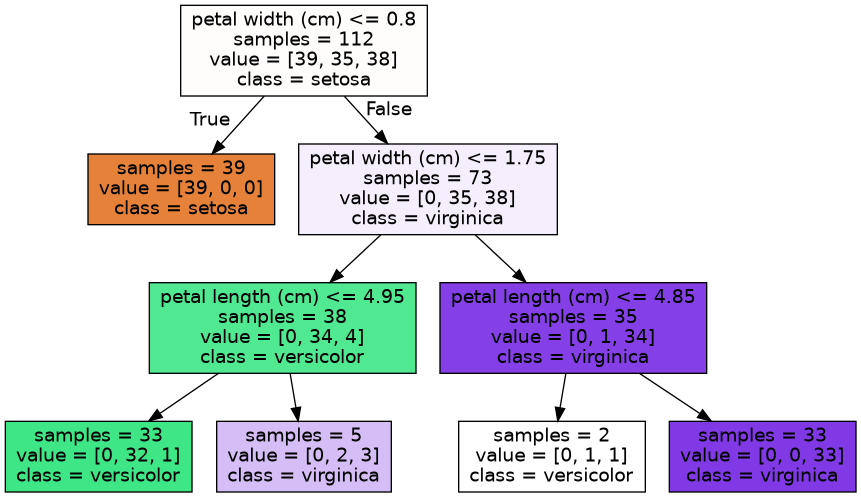

In [49]:
create_graph_tree(tree, flowers.target_names, flowers.feature_names)
display_tree("tree.dot")
Image(filename='tree.png') 

##You must now have a tree with a max deep of threec##

Let see if our model score change.

In [50]:
print("Accuracy on training set: {:.3f} / 1.000".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f} / 1.000".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.964 / 1.000
Accuracy on test set: 0.974 / 1.000


We can see that with a tree with half branch the accuracy result is as well as the deeper one. That means that when the we train the tree at first we create a useless branch 

**Résultat attendu**:

<table style="width:90%">
    <tr>
        <td>Accuracy on training set:</td>
        <td> 0.964 / 1.000</td> 
    </tr>
    <tr>
        <td>Accuracy on test set:</td>
        <td> 0.974 / 1.000</td> 
    </tr>
</table>



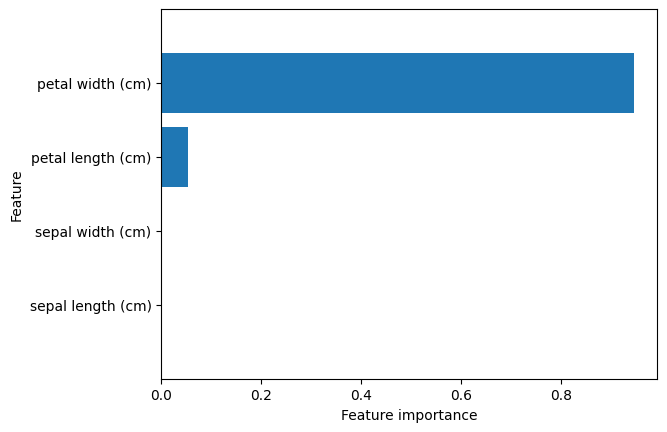

In [51]:
from matplotlib import pyplot as plt

def plot_feature_importance(model, dataset):
    n_features = dataset.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(tree, flowers)

This graph shows the use of the different information about the dataset.



**Conclusion**

Well done you have created and trained your own decision tree.
We have optimized the results of our tree using a max depth variable to avoid overfitting.

Generally dealing with the max depth variable is enough to keep a good accuracy with simple data set, but when you use more complexes one the performance becomes quickly very bad. 

Then we going to use **ensemble methods**

## 4 - Ensembles of Decision Trees ##

The goal of [ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html) is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalization and robustness.

We will see 2 of the most famous ensembles trees:
   
<table style="width:90%">
    <tr>
        <td>Random Forest</td>
        <td>(Regressor / Classifier)</td> 
    </tr>
    <tr>
        <td>Gradient Boost</td>
        <td>(Regressor / Classifier)</td> 
    </tr>
</table>

### 4.1 build Random Forest

As we have seen in previous steps, decision tree can overfit really quickly. To avoid that, we are going to train several trees and compare their results to get better accuracy for every dataset.

We are now going to use a new and more complex dataset:

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

**Exercise**: You now need to load the dataset and split it like we did before.

In [56]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


**Wanted output**:
       
<table style="width:20%">
  <tr>
    <td>shape de X_train</td>
    <td>(426, 30)</td> 
  </tr>
  
  <tr>
    <td>shape de x_test</td>
    <td>(143, 30)</td> 
  </tr>
    
   <tr>
    <td>shape de y_train</td>
    <td>(426,)</td> 
  </tr>
    <tr>
    <td>shape de y_test</td>
    <td>(143,)</td> 
  </tr>
</table>

**Exercise**: Let build your forest with the [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and fit it with the Cancer dataset.

**Help**: You must set the number of trees to 5 with n_estimators, the random_state to 2 and chose a max_depth value for the trees

In [85]:
##need one line to create the forest 
forest = RandomForestClassifier(random_state=2, n_estimators=5, max_depth=1) ## Need args
##need one line to fit the forest tree with X_train and y_train
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=5, random_state=2)

In [86]:
from src.plotlib.plot_fonc import *

plot_forest(forest, cancer)

There is a plot of all tree in the forest

In [87]:
print("Accuracy on training set: {:.3f} / 1.000".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f} / 1.000".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.923 / 1.000
Accuracy on test set: 0.930 / 1.000


We have very good accuracy who is guaranteed to be generalist thanking to the tree merges.

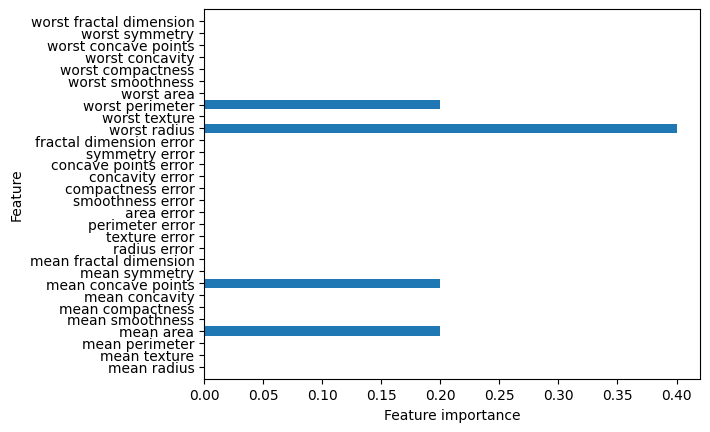

In [88]:
plot_feature_importance(forest, cancer)

As we can see on the graph must more information are used in forest to predict results. 

**Conclusion**

Random forests are the best way to quickly classify datasets.

To increase the forest accuracy you can play with the number of trees or branches. But be careful, random forest are **" random "** so if you change the "random_stats" the result will probably move a lot.

You made your first forest **grow up**, well done. Now we will look at a more complex model who outperforms random forest thank to loss function...

### 4.2 Gradient Boosting tree ###

The gradient boosting is a general technique which consists of aggregating classifiers (trees) train sequentially on a learning dataset whose individual prediction are corrected at each 
step. Classifiers are weighted according to their performance.

So more a model predicts a bad answer, the more it will be corrected and vice versa. We call that [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) 

A chance for us, the library sklearn does those calculations for us.

**Exercise**: Let build your Gradient Boosting tree with the [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html?highlight=gradient#sklearn.ensemble.GradientBoostingClassifier) and fit it with the Cancer dataset (X_train, y_train).

**Help**: By default the Gradient Boosting tree has a depth of three

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

##one line to init the GradientBoostingClassifier
gradient_tree = GradientBoostingClassifier(learning_rate=1) ##Need function
##give the train data and labels to fit the tree
gradient_tree.fit(X_train, y_train)

GradientBoostingClassifier()

In [94]:
print("Accuracy on training set: {:.3f} / 1.000".format(gradient_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f} / 1.000".format(gradient_tree.score(X_test, y_test)))

Accuracy on training set: 1.000 / 1.000
Accuracy on test set: 0.965 / 1.000


If you have correctly set up the model you should have very good results in the training and the test set.

If you have an accuracy of 1.000 is probably due to an overfitting. You must correct that with the   [learning_rate](https://en.wikipedia.org/wiki/Learning_rate) argument from  [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

**Conclusion**:

As we can see, the results are approximately the same as the **Random forest**. However the gradient leaves us a greater freedom of adaptation which allows to manage a greater number of cases and need less branch to work well, therefore accelerate the learning process.

## 5 - End ##

Well done, you had completed each of the points of this workshop. You had acquired the necessary skills to build decision trees for your own dataset. I now encourage you to find a dataset that you like and to build a decision tree on your own. [Dataset](https://scikit-learn.org/stable/datasets.html)


In [6]:
## You can code 